In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'FP com 2024.csv'  # Asegúrate de que el archivo CSV esté en el mismo directorio que tu notebook o proporciona la ruta completa
df = pd.read_csv(file_path)

pd.options.display.float_format = '{:,.2f}'.format

In [86]:
# Filtrar las filas que tengan el N° 26357 en la Columna 25 (Productor póliza)
df = df[df[df.columns[24]] == 26357]

In [87]:
# Diccionario para renombrar los ramos
ramos_dict = {
    1: "INCENDIO",
    2: "TRANSPORTE",
    3: "AERONAVEGACIÓN",
    4: "AUTOMOTORES",
    5: "CRISTALES",
    6: "ROBO",
    7: "RIESGOS VARIOS",
    8: "RESP. CIVIL",
    9: "SEGURO TÉCNICO",
    10: "RS. AGROPECUARIOS",
    12: "ACC. PERSONALES",
    13: "CAUCIÓN",
    17: "VIDA OBLIGATORIO",
    18: "VIDA COLECTIVO",
    19: "VIDA INDIVIDUAL",
    22: "CASCOS",
    24: "COMB FLIAR",
    25: "INDUSTRIA y COM.",
    35: "ACC. A PASAJEROS",
    36: "SEGURO DE SALUD",
    37: "SEGURO DE SEPELIO",
    44: "MOTOVEHÍCULOS",
    80: "ART"
}

# Reemplazar los números por nombres de ramos en la columna correspondiente
df[df.columns[8]] = df[df.columns[8]].map(ramos_dict)



# Filtrar el dataframe excluyendo ramos 12 (ACC. PERSONALES) y 19 (VIDA INDIVIDUAL)
df = df[~df[df.columns[8]].isin(["ACC. PERSONALES", "VIDA INDIVIDUAL"])]



In [88]:
# Diccionario para traducir meses en español a inglés
meses_espanol = {
    'ene': 'jan',
    'feb': 'feb',
    'mar': 'mar',
    'abr': 'apr',
    'may': 'may',
    'jun': 'jun',
    'jul': 'jul',
    'ago': 'aug',
    'sep': 'sep',
    'oct': 'oct',
    'nov': 'nov',
    'dic': 'dec'
}

# Reemplazar los meses en español por los meses en inglés en la columna 'Mes-Año'
df[df.columns[4]] = df[df.columns[4]].str[:3].replace(meses_espanol) + df[df.columns[4]].str[3:]


Evolución por cobros totales (agrupados por Mes-año):
     Mes-año        Premio  % del total    Premio_num
3 2024-01-01 49,407,890.11         8.12 49,407,890.11
2 2024-02-01 55,610,589.96         9.14 55,610,589.96
6 2024-03-01 68,498,509.29        11.26 68,498,509.29
0 2024-04-01 73,974,003.49        12.16 73,974,003.49
7 2024-05-01 81,029,054.73        13.32 81,029,054.73
5 2024-06-01 86,296,565.02        14.19 86,296,565.02
4 2024-07-01 94,520,353.36        15.54 94,520,353.36
1 2024-08-01 98,805,912.98        16.25 98,805,912.98


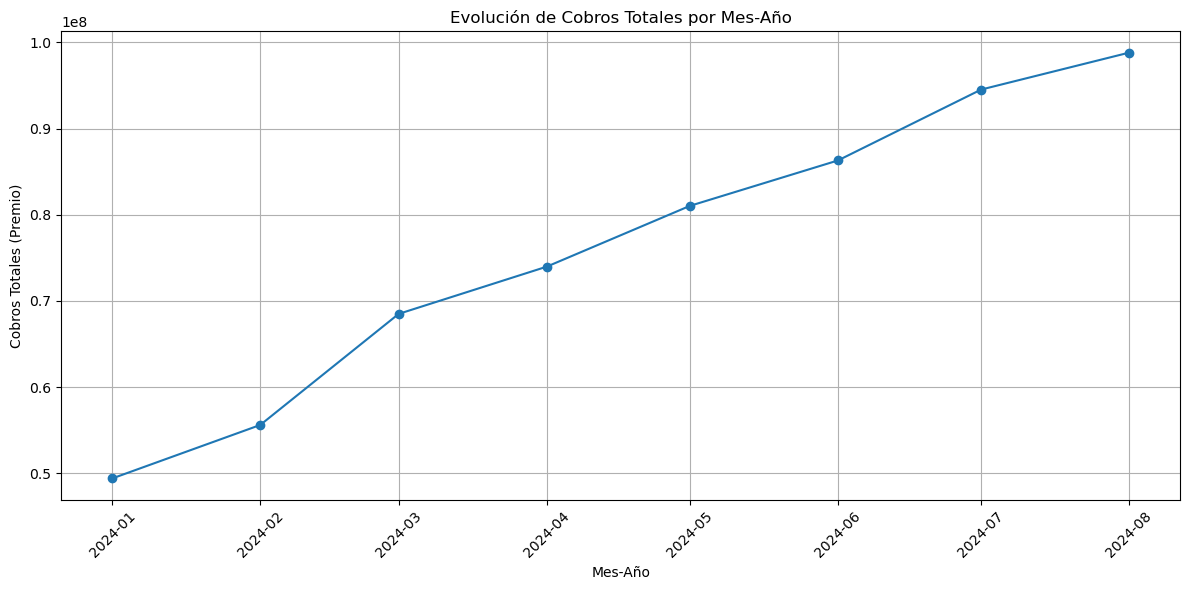

In [89]:


# 1. Evolución por cobros totales (sumatoria de Columna 19 Premio, agrupados por Columna 5 Mes-año)
evolucion_cobros = df.groupby(df.columns[4])[df.columns[18]].sum().reset_index()

# Convertir la columna "Mes-año" a tipo fecha usando el formato en inglés
evolucion_cobros[df.columns[4]] = pd.to_datetime(evolucion_cobros[df.columns[4]], format='%b-%y')

# Ordenar por la columna de fecha
evolucion_cobros = evolucion_cobros.sort_values(by=df.columns[4])

# Calcular el porcentaje del total
evolucion_cobros['% del total'] = (evolucion_cobros[df.columns[18]] / evolucion_cobros[df.columns[18]].sum()) * 100

# Convertir el valor de "Premio" a número para graficar
evolucion_cobros['Premio_num'] = evolucion_cobros[df.columns[18]].replace({',': ''}, regex=True).astype(float)

# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)


print("\nEvolución por cobros totales (agrupados por Mes-año):")
print(evolucion_cobros)


# Gráfico de líneas para la evolución de cobros totales
plt.figure(figsize=(12,6))
plt.plot(evolucion_cobros[df.columns[4]], evolucion_cobros['Premio_num'], marker='o')
plt.title('Evolución de Cobros Totales por Mes-Año')
plt.xlabel('Mes-Año')
plt.ylabel('Cobros Totales (Premio)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Cantidad por ramo (conteo de filas agrupados por Ramo):
                 Ramo  Premio  % del total
2         AUTOMOTORES   12099        69.81
4          COMB FLIAR    1371         7.91
11    SEGURO DE SALUD    1158         6.68
7       MOTOVEHÍCULOS     685         3.95
5            INCENDIO     669         3.86
8         RESP. CIVIL     528         3.05
9      RIESGOS VARIOS     217         1.25
10               ROBO     206         1.19
1                 ART     123         0.71
0    ACC. A PASAJEROS     103         0.59
6    INDUSTRIA y COM.     103         0.59
13     SEGURO TÉCNICO      34         0.20
3             CAUCIÓN      18         0.10
14         TRANSPORTE      13         0.08
12  SEGURO DE SEPELIO       4         0.02


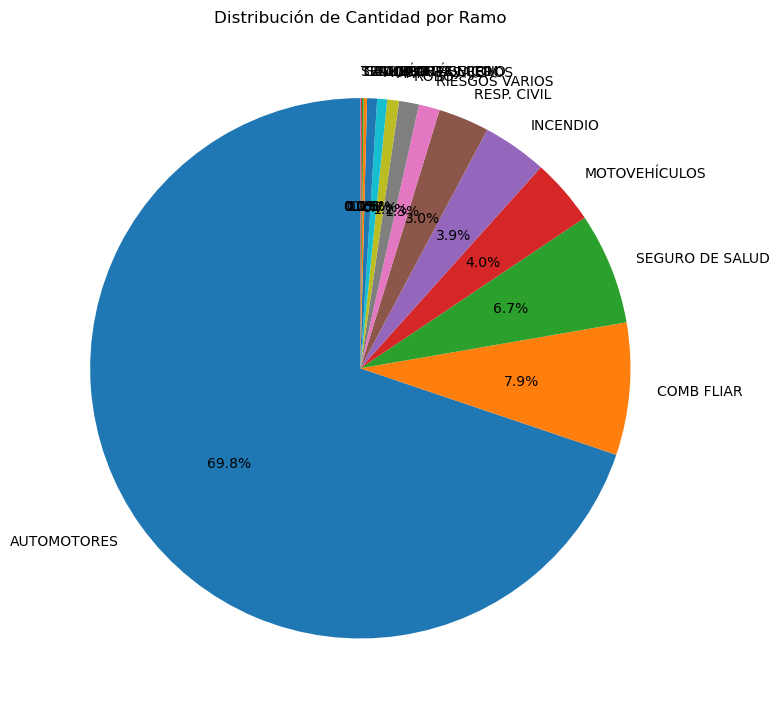

In [90]:
# 2. Cantidad por ramo (conteo de filas de Columna 19 Premio, agrupados por Columna 9 Ramo)

# Agrupación y conteo por ramo
cantidad_por_ramo = df.groupby(df.columns[8])[df.columns[18]].count().reset_index()
cantidad_por_ramo['% del total'] = (cantidad_por_ramo[df.columns[18]] / cantidad_por_ramo[df.columns[18]].sum()) * 100
cantidad_por_ramo = cantidad_por_ramo.sort_values(by=df.columns[18], ascending=False)
print("\nCantidad por ramo (conteo de filas agrupados por Ramo):")
print(cantidad_por_ramo)

# Gráfico de torta para la cantidad por ramo
if not cantidad_por_ramo.empty:
    plt.figure(figsize=(8,8))
    plt.pie(cantidad_por_ramo[df.columns[18]], labels=cantidad_por_ramo[df.columns[8]], autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Cantidad por Ramo')
    plt.tight_layout()
    plt.show()
else:
    print("\nEl DataFrame cantidad_por_ramo está vacío. No se puede generar el gráfico.")


Cantidad por forma de pago (sumatoria agrupados por Origen Ingreso):
   Origen Ingreso          Premio  % del total
0            AFIP    5,201,730.01         0.86
1            AJUS     -883,558.84        -0.15
2             ART       11,138.09         0.00
3            DEBI  351,836,674.00        57.85
4            DESC      131,999.24         0.02
5            DEVO     -982,551.36        -0.16
6            EXPR   14,494,356.04         2.38
7            LINK   12,447,132.16         2.05
8            PA24    1,021,114.57         0.17
9            PAGF  116,670,427.64        19.18
10           PLUS      487,871.56         0.08
11            PMC   33,096,454.70         5.44
12           PNET    1,407,240.22         0.23
13           PROD   49,176,286.10         8.09
14           RAPI   17,695,501.82         2.91
15           RIPS      888,070.51         0.15
16           WEBS    5,442,992.48         0.90


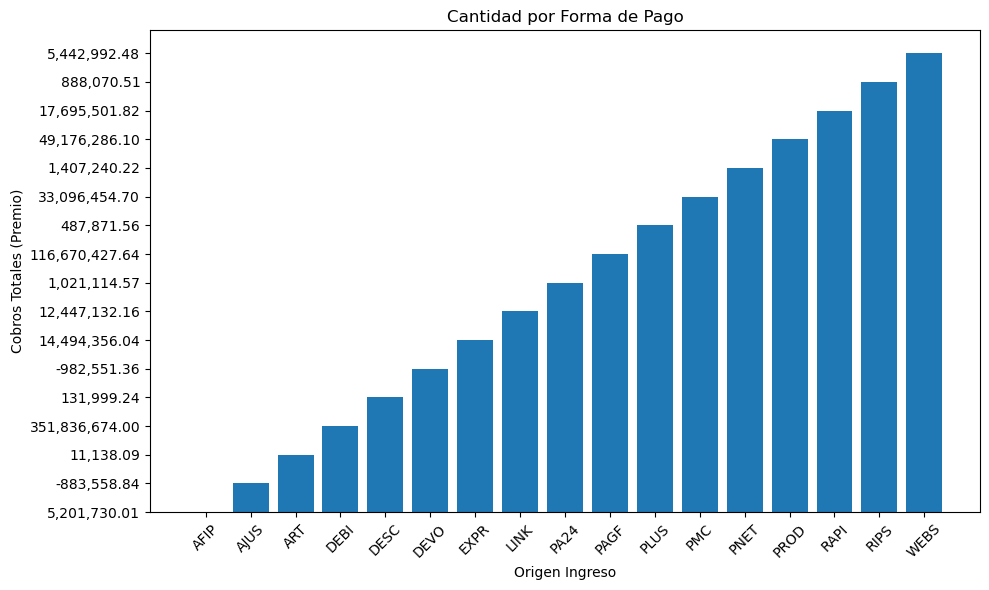

In [91]:
#3 Cantidad por forma de pago (sumatoria de Columna 19 Premio, agrupados por Columna 7 Origen Ingreso)
cantidad_por_forma_pago = df.groupby(df.columns[6])[df.columns[18]].sum().reset_index()
cantidad_por_forma_pago['% del total'] = (cantidad_por_forma_pago[df.columns[18]] / cantidad_por_forma_pago[df.columns[18]].sum()) * 100

# Formatear la columna "Premio" para mostrar con separador de miles y sin notación científica
cantidad_por_forma_pago[df.columns[18]] = cantidad_por_forma_pago[df.columns[18]].apply(lambda x: "{:,.2f}".format(x))


print("\nCantidad por forma de pago (sumatoria agrupados por Origen Ingreso):")
print(cantidad_por_forma_pago)




# Gráfico de barras para la cantidad por forma de pago
plt.figure(figsize=(10,6))
plt.bar(cantidad_por_forma_pago[df.columns[6]], cantidad_por_forma_pago[df.columns[18]])
plt.title('Cantidad por Forma de Pago')
plt.xlabel('Origen Ingreso')
plt.ylabel('Cobros Totales (Premio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


20 asegurados que pagan más pólizas:
                                 Asegurado  PÃ³liza
1488                SCHMIDT ROBERTO CARLOS       90
1502          SERRANO VERONICA GUILLERMINA       83
390                          CINELLI DIEGO       69
683                   GARITA ANGELES BELEN       68
1702                    ZARDIN MIRTA MABEL       63
1546                         STAUBER MARIA       59
1217                 PABLO SEBASTIAN SAGER       56
1136  MUSSINO STAUBER MARIANO LUCIANO ADRI       54
541              ESCUDERO PATRICIO GABRIEL       49
1583              TOMINICH MARCELO ORLANDO       49
612           FLORES HEIN GUILLERMO HERNAN       45
1538    SPAGNOLO DAINOTTA CRISTIAN MARIANO       44
1368               RIOFRIO MARIANO GABRIEL       43
726     GOMES ROMANO LYDIA DE LOS MILAGROS       41
638                FRIEDRICH JORGE ALBERTO       40
863                    JEREZ MAURO GONZALO       40
1276               PEREZ LEONARDO EZEQUIEL       39
828                       

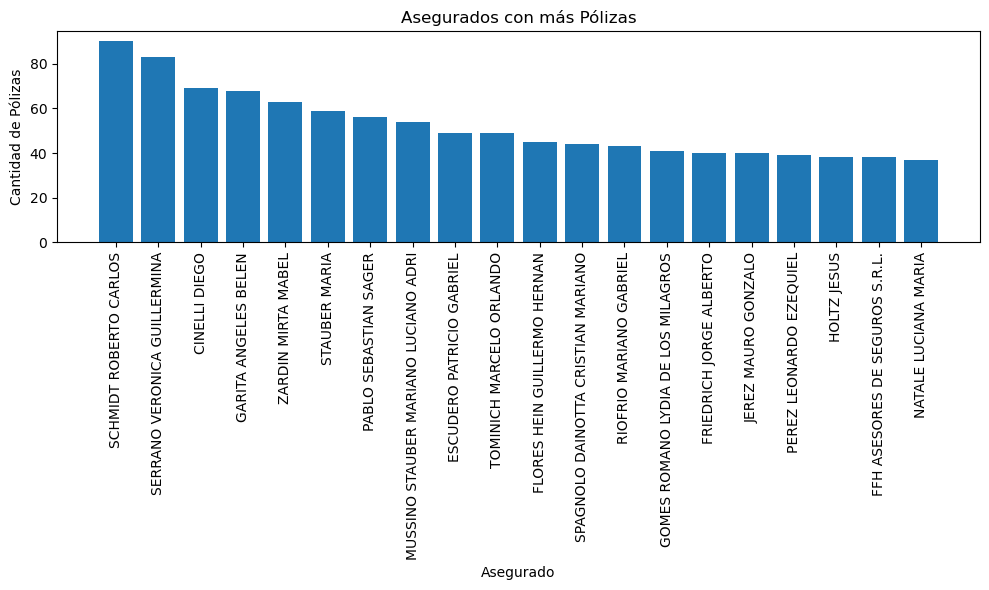

In [92]:
#4 20 asegurados que pagan más pólizas (20 asegurados de Columna 8 Asegurado - que tengan más pólizas en Columna 10 Poliza)
asegurados_mas_polizas = df.groupby(df.columns[7])[df.columns[9]].count().reset_index().sort_values(by=df.columns[9], ascending=False).head(20)
print("\n20 asegurados que pagan más pólizas:")
print(asegurados_mas_polizas)

# Gráfico de barras para los asegurados con más pólizas
plt.figure(figsize=(10,6))
plt.bar(asegurados_mas_polizas[df.columns[7]], asegurados_mas_polizas[df.columns[9]])
plt.title('Asegurados con más Pólizas')
plt.xlabel('Asegurado')
plt.ylabel('Cantidad de Pólizas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


20 asegurados que pagan el premio más alto:
                                        Asegurado       Premio
847                              INTELEKTRON S.A. 5,733,972.95
1488                       SCHMIDT ROBERTO CARLOS 5,016,976.11
177                        BASILE NAHUEL JEREMIAS 4,633,712.79
828                                   HOLTZ JESUS 2,550,019.17
1583                     TOMINICH MARCELO ORLANDO 2,539,143.93
1332                            RACHELE MARIANELA 2,270,427.01
1702                           ZARDIN MIRTA MABEL 2,261,122.42
935   LIMPIEZA Y CONSTRUCCIONES ARGENTINAS S.R.L. 2,226,935.98
392                CIRCUS ENTERTAINMENT GROUP S.A 2,148,768.58
1424                       ROSALES CRISTIAN CESAR 1,696,238.25
1276                      PEREZ LEONARDO EZEQUIEL 1,632,956.18
139                             BAEZ TAMARA ABRIL 1,630,203.03
1577                          TOBARES VICTOR HUGO 1,608,259.94
883                    KARAMANOS ANDRES ALEJANDRO 1,525,415.62
184       

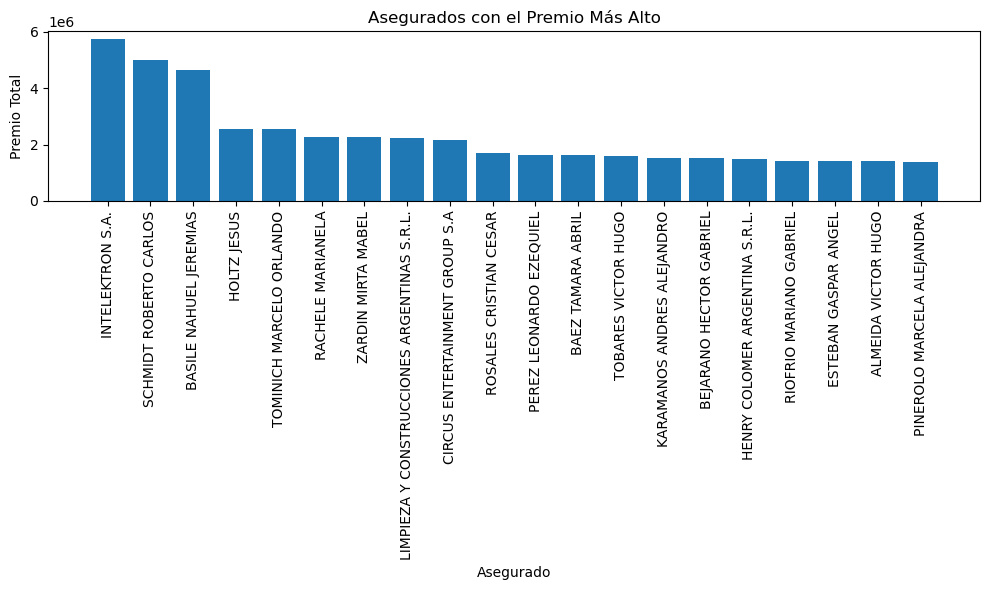

In [93]:
#5 20 asegurados que pagan el premio más alto, por sumatoria de pólizas o por pólizas individuales
asegurados_premio_mas_alto = df.groupby(df.columns[7])[df.columns[18]].sum().reset_index().sort_values(by=df.columns[18], ascending=False).head(20)
print("\n20 asegurados que pagan el premio más alto:")
print(asegurados_premio_mas_alto)

# Gráfico de barras para asegurados con el premio más alto
plt.figure(figsize=(10,6))
plt.bar(asegurados_premio_mas_alto[df.columns[7]], asegurados_premio_mas_alto[df.columns[18]])
plt.title('Asegurados con el Premio Más Alto')
plt.xlabel('Asegurado')
plt.ylabel('Premio Total')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


20 asegurados que generan más comisión:
                           Asegurado  ComisiÃ³n cobranza
847                 INTELEKTRON S.A.          131,134.07
1488          SCHMIDT ROBERTO CARLOS          120,283.29
177           BASILE NAHUEL JEREMIAS          111,557.61
1583        TOMINICH MARCELO ORLANDO           66,571.80
828                      HOLTZ JESUS           63,047.88
1332               RACHELE MARIANELA           57,092.65
1702              ZARDIN MIRTA MABEL           56,063.99
392   CIRCUS ENTERTAINMENT GROUP S.A           51,093.56
139                BAEZ TAMARA ABRIL           45,880.06
1424          ROSALES CRISTIAN CESAR           43,441.78
1276         PEREZ LEONARDO EZEQUIEL           41,699.68
1577             TOBARES VICTOR HUGO           39,269.94
184          BEJARANO HECTOR GABRIEL           38,483.00
883       KARAMANOS ANDRES ALEJANDRO           37,186.49
1368         RIOFRIO MARIANO GABRIEL           36,760.74
338            CASTAÃ‘O SILVIA MABEL           

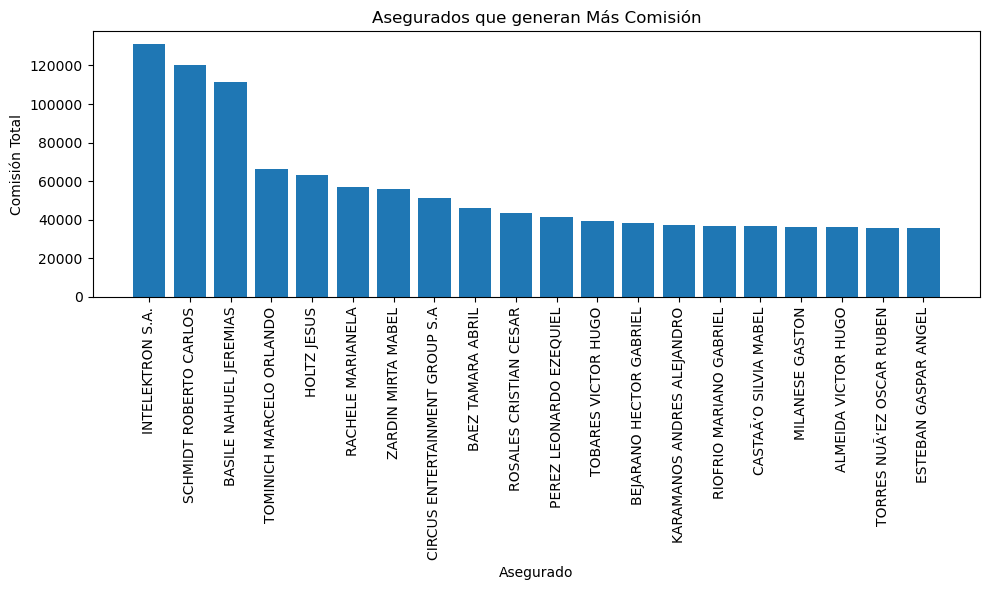

In [94]:
#6 20 asegurados que nos da más comisión (20 asegurados de Columna 8 Asegurado - con premio más alto en Columna 21 Comision cobranza)
asegurados_mas_comision = df.groupby(df.columns[7])[df.columns[20]].sum().reset_index().sort_values(by=df.columns[20], ascending=False).head(20)
print("\n20 asegurados que generan más comisión:")
print(asegurados_mas_comision)

# Gráfico de barras para asegurados con más comisión
plt.figure(figsize=(10,6))
plt.bar(asegurados_mas_comision[df.columns[7]], asegurados_mas_comision[df.columns[20]])
plt.title('Asegurados que generan Más Comisión')
plt.xlabel('Asegurado')
plt.ylabel('Comisión Total')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [95]:
# Filtrar los ramos específicos que mencionaste
ramos_interes = ["AUTOMOTORES", "COMB FLIAR", "INDUSTRIA y COM.", "ART"]
df = df[df[df.columns[8]].isin(ramos_interes)]


Evolución de asegurados por ramo y mes-año:


,Ramo,Mes-Año,Cantidad Asegurados
0,ART,2024-01-01,17
23,INDUSTRIA y COM.,2024-01-01,13
7,AUTOMOTORES,2024-01-01,1434
15,COMB FLIAR,2024-01-01,171
8,AUTOMOTORES,2024-02-01,1437
24,INDUSTRIA y COM.,2024-02-01,13
1,ART,2024-02-01,15
16,COMB FLIAR,2024-02-01,169
17,COMB FLIAR,2024-03-01,160
2,ART,2024-03-01,23


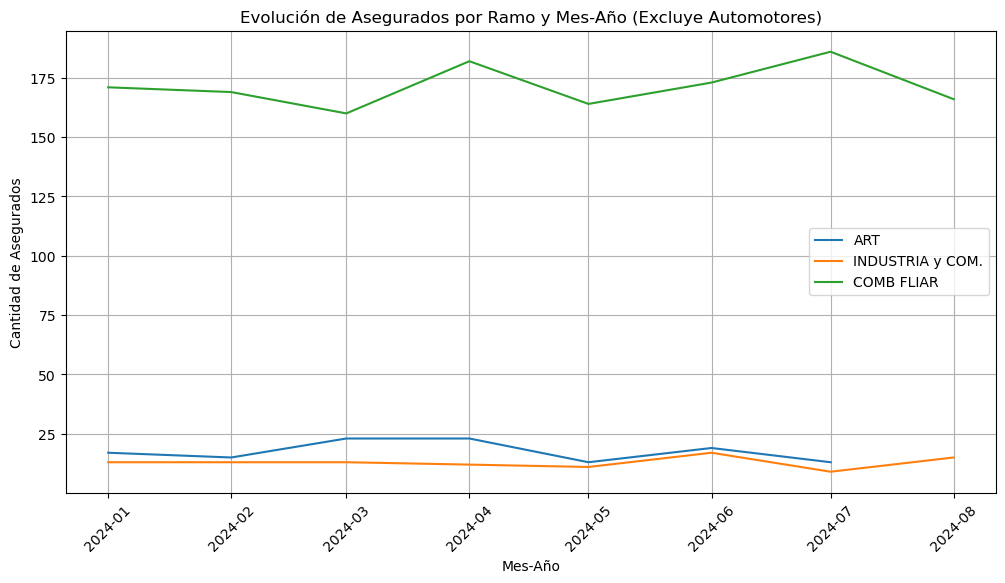

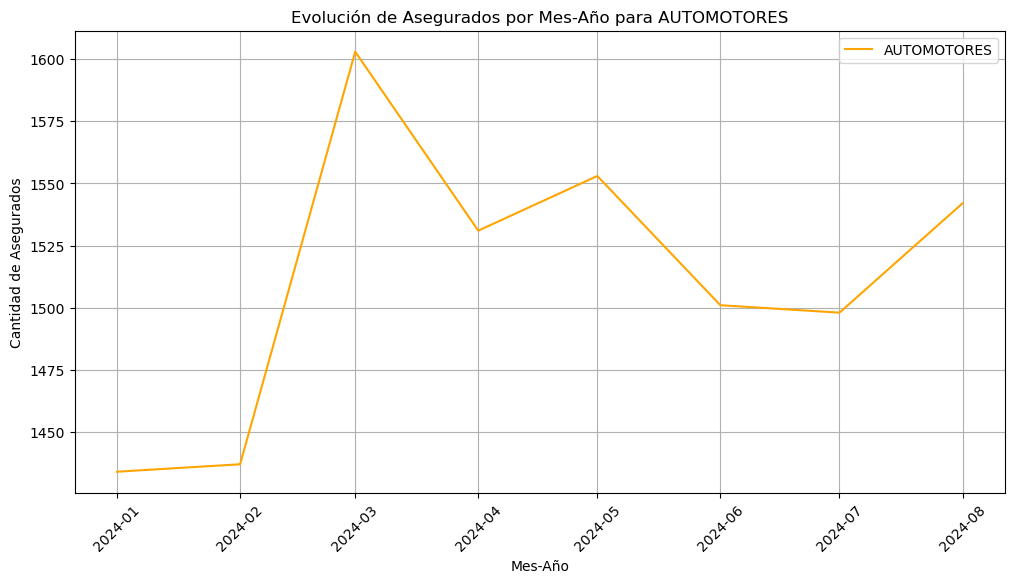

In [96]:
# Evolución de asegurados por ramo y mes-año: suma de asegurados, agrupados por ramo y mes-año
# Convertir la columna Mes-Año a un tipo ordenable (debe ser una cadena en formato %m-%y)
df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%b-%y')

# Evolución de asegurados por ramo y mes-año: suma de asegurados, agrupados por ramo y mes-año
evolucion_asegurados_ramo = df.groupby([df.columns[8], df.columns[4]])[df.columns[7]].count().reset_index()
evolucion_asegurados_ramo.columns = ['Ramo', 'Mes-Año', 'Cantidad Asegurados']
evolucion_asegurados_ramo = evolucion_asegurados_ramo.sort_values('Mes-Año')
print("\nEvolución de asegurados por ramo y mes-año:")
display(evolucion_asegurados_ramo)

# Generar gráfico de líneas de evolución de asegurados por ramo
plt.figure(figsize=(12, 6))
for ramo in evolucion_asegurados_ramo['Ramo'].unique():
    if ramo != "AUTOMOTORES":  # Evitar graficar el ramo AUTOMOTORES en esta parte
        data = evolucion_asegurados_ramo[evolucion_asegurados_ramo['Ramo'] == ramo]
        plt.plot(data['Mes-Año'], data['Cantidad Asegurados'], label=ramo)
plt.title('Evolución de Asegurados por Ramo y Mes-Año (Excluye Automotores)')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Asegurados')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Gráfico específico para el ramo AUTOMOTORES
plt.figure(figsize=(12, 6))
data_auto = evolucion_asegurados_ramo[evolucion_asegurados_ramo['Ramo'] == "AUTOMOTORES"]
plt.plot(data_auto['Mes-Año'], data_auto['Cantidad Asegurados'], label='AUTOMOTORES', color='orange')
plt.title('Evolución de Asegurados por Mes-Año para AUTOMOTORES')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Asegurados')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Evolución de pólizas por ramo y mes-año:


,Ramo,Mes-Año,Cantidad Pólizas
0,ART,2024-01-01,17
23,INDUSTRIA y COM.,2024-01-01,13
7,AUTOMOTORES,2024-01-01,1434
15,COMB FLIAR,2024-01-01,171
8,AUTOMOTORES,2024-02-01,1437
24,INDUSTRIA y COM.,2024-02-01,13
1,ART,2024-02-01,15
16,COMB FLIAR,2024-02-01,169
17,COMB FLIAR,2024-03-01,160
2,ART,2024-03-01,23


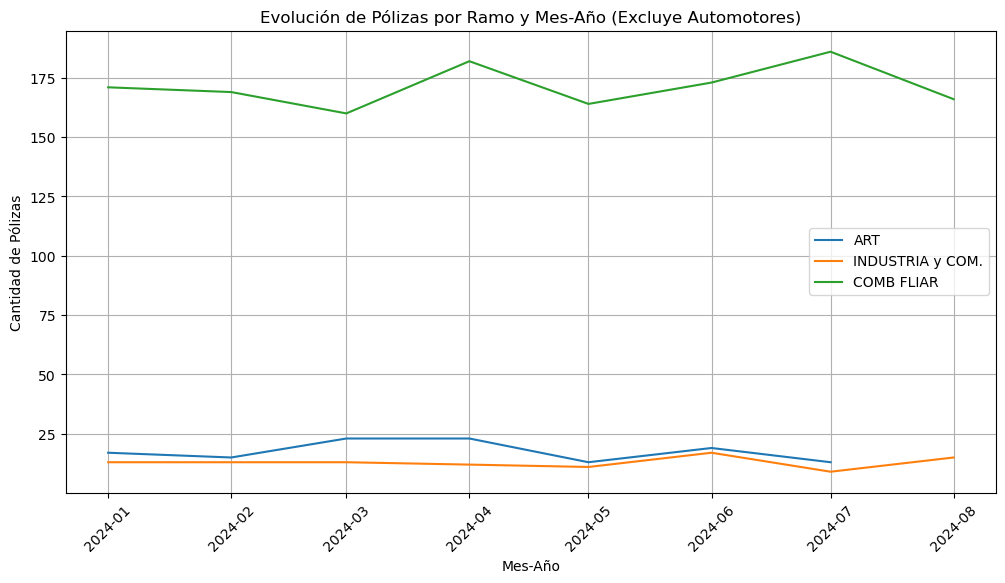

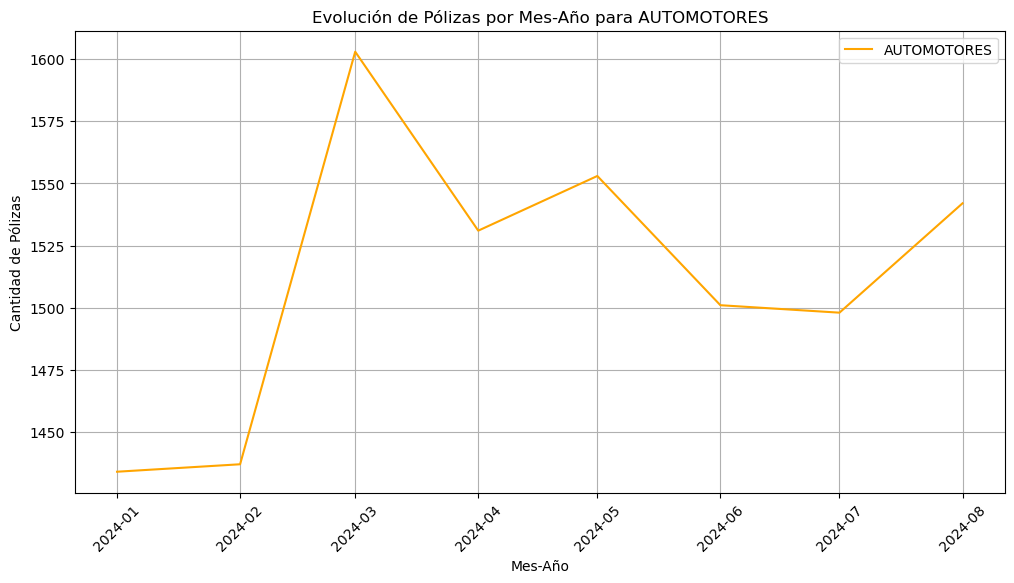

In [97]:
# Evolución de pólizas por ramo y mes-año: suma de pólizas, agrupados por ramo y mes-año

# Convertir la columna Mes-Año a un tipo ordenable (debe ser una cadena en formato %m-%y)
df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%b-%y')

evolucion_polizas_ramo = df.groupby([df.columns[8], df.columns[4]])[df.columns[9]].count().reset_index()
evolucion_polizas_ramo.columns = ['Ramo', 'Mes-Año', 'Cantidad Pólizas']
evolucion_polizas_ramo = evolucion_polizas_ramo.sort_values('Mes-Año')
print("\nEvolución de pólizas por ramo y mes-año:")
display(evolucion_polizas_ramo)

# Generar gráfico de líneas de evolución de pólizas por ramo
plt.figure(figsize=(12, 6))
for ramo in evolucion_polizas_ramo['Ramo'].unique():
    if ramo != "AUTOMOTORES":  # Evitar graficar el ramo AUTOMOTORES en esta parte
        data = evolucion_polizas_ramo[evolucion_polizas_ramo['Ramo'] == ramo]
        plt.plot(data['Mes-Año'], data['Cantidad Pólizas'], label=ramo)
plt.title('Evolución de Pólizas por Ramo y Mes-Año (Excluye Automotores)')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Pólizas')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Gráfico específico para el ramo AUTOMOTORES
plt.figure(figsize=(12, 6))
data_auto_polizas = evolucion_polizas_ramo[evolucion_polizas_ramo['Ramo'] == "AUTOMOTORES"]
plt.plot(data_auto_polizas['Mes-Año'], data_auto_polizas['Cantidad Pólizas'], label='AUTOMOTORES', color='orange')
plt.title('Evolución de Pólizas por Mes-Año para AUTOMOTORES')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Pólizas')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


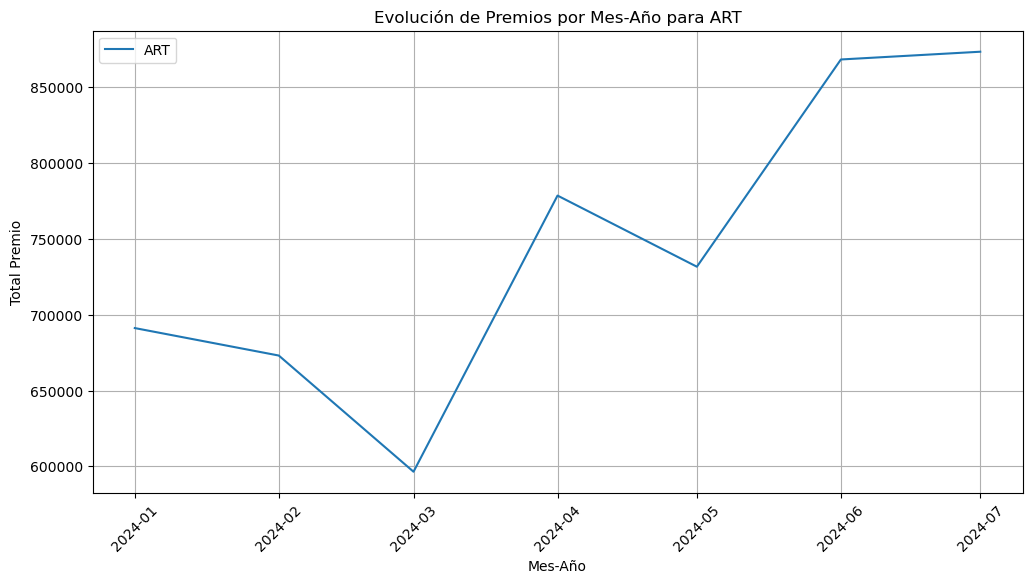

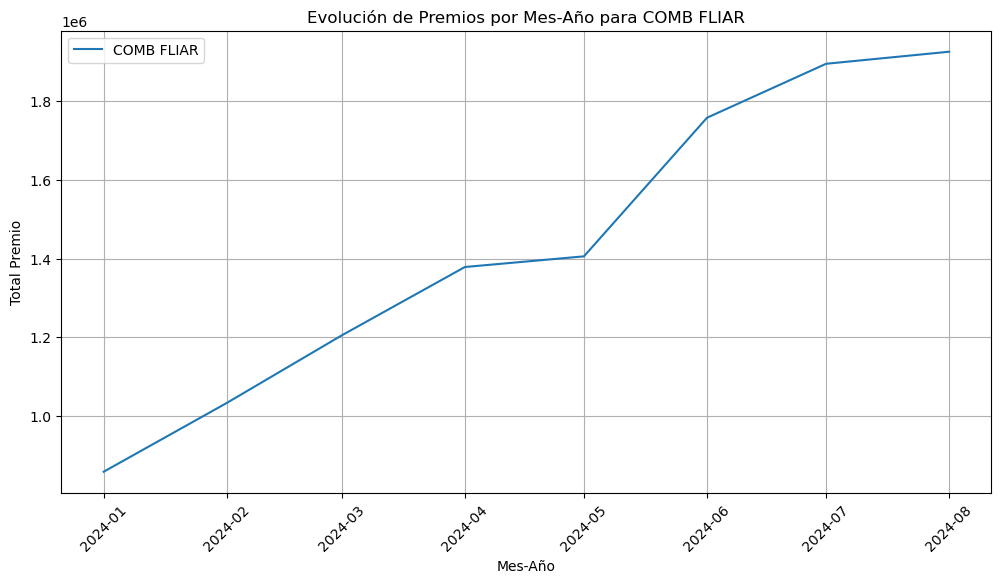

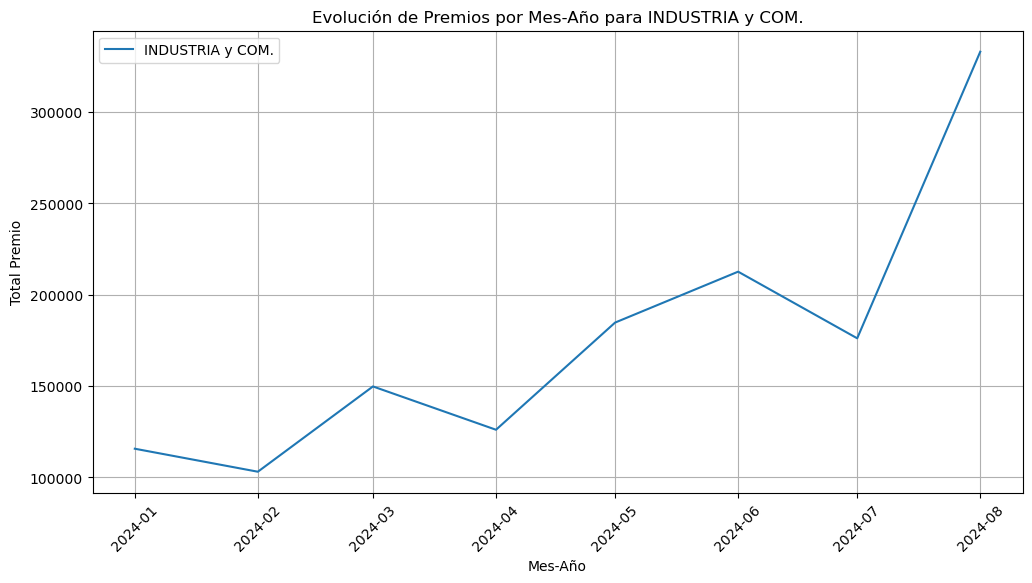

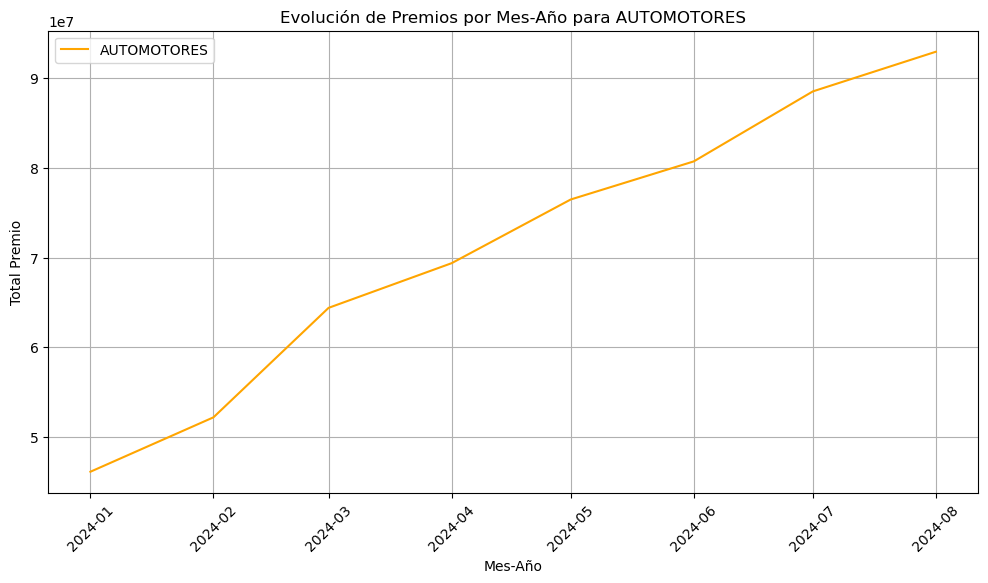

In [98]:
# Evolución de premios por ramo y mes-año: suma de premios, agrupados por ramo y mes-año

# Convertir la columna Mes-Año a un tipo ordenable (debe ser una cadena en formato %m-%y)
df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%b-%y')



# Evolución de premios por ramo y mes-año: suma de premios, agrupados por ramo y mes-año
evolucion_premios_ramo = df.groupby([df.columns[8], df.columns[4]])[df.columns[18]].sum().reset_index()
evolucion_premios_ramo.columns = ['Ramo', 'Mes-Año', 'Total Premio']

# Generar gráficos separados para cada ramo
for ramo in evolucion_premios_ramo['Ramo'].unique():
    if ramo != "AUTOMOTORES":  # Evitar graficar el ramo AUTOMOTORES en esta parte
        plt.figure(figsize=(12, 6))
        data = evolucion_premios_ramo[evolucion_premios_ramo['Ramo'] == ramo].sort_values('Mes-Año')
        plt.plot(data['Mes-Año'], data['Total Premio'], label=ramo)
        plt.title(f'Evolución de Premios por Mes-Año para {ramo}')
        plt.xlabel('Mes-Año')
        plt.ylabel('Total Premio')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()
        plt.show()

# Gráfico específico para el ramo AUTOMOTORES
plt.figure(figsize=(12, 6))
data_auto = evolucion_premios_ramo[evolucion_premios_ramo['Ramo'] == "AUTOMOTORES"].sort_values('Mes-Año')
plt.plot(data_auto['Mes-Año'], data_auto['Total Premio'], label='AUTOMOTORES', color='orange')
plt.title('Evolución de Premios por Mes-Año para AUTOMOTORES')
plt.xlabel('Mes-Año')
plt.ylabel('Total Premio')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()